In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

In [41]:
bostonDF.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [42]:
# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print("Boston 데이타셋 크기 : ", bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
bostonDF.isnull().sum() # 이미 정리를 해논 데이터라 없을 확률이 높음

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

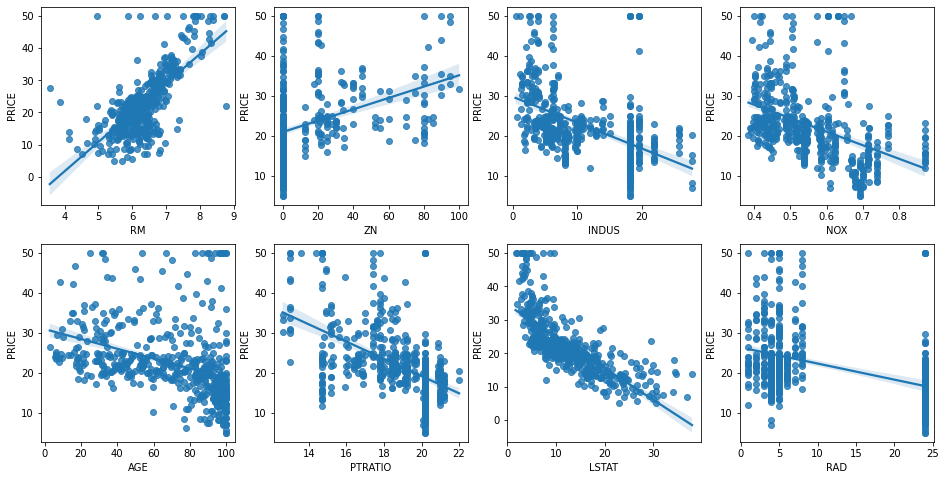

In [44]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds))) # 회귀점수함수

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [46]:
print('Variance score : {0:.3f}'.format(r2_score(y_preds, y_test)))

Variance score : 0.708


In [24]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 딥러닝

In [25]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()
# model.add(Dense(26, activation='relu', input_shape=(13,))) # 하드코딩 주의!!
model.add(Dense(26, activation='relu', input_shape=(X_data.shape[1],)))
model.add(Dense(26, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))

In [47]:
X_data.shape[1]


13

In [26]:
from keras import optimizers
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
             loss='mse', # cost function 
             metrics=['mae', 'mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 26)                364       
                                                                 
 dense_9 (Dense)             (None, 26)                702       
                                                                 
 dense_10 (Dense)            (None, 12)                324       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


In [27]:
print(13 * 26 + 26)
print(26 * 26 + 26)
print(26 * 12 + 12)
print(12 * 1 + 1)

364
702
324
13


In [28]:
model.weights # 이 값을 업데이트 시킬거임.

[<tf.Variable 'dense_8/kernel:0' shape=(13, 26) dtype=float32, numpy=
 array([[-0.19562659,  0.11247411,  0.30715236, -0.19565922, -0.13618937,
          0.24848965,  0.07201278,  0.05239448,  0.33056322,  0.03849694,
          0.0225822 , -0.37816566, -0.06772709,  0.19101486,  0.36124483,
         -0.10994443,  0.08446279,  0.01305568,  0.26631406,  0.15413949,
          0.29686388,  0.03872737, -0.3364157 ,  0.17223921, -0.34503052,
          0.13258669],
        [ 0.16368654, -0.17372675,  0.21531054,  0.31613442, -0.2019442 ,
         -0.3755853 , -0.15299766, -0.2508284 , -0.02357629,  0.31960902,
         -0.0391466 ,  0.14891914,  0.29854408,  0.38068077, -0.10871172,
          0.09371239, -0.3572878 ,  0.05794826, -0.2232374 , -0.3559781 ,
         -0.14097148, -0.38173667,  0.34605697,  0.09297559,  0.15935126,
          0.1801165 ],
        [-0.03122267, -0.3624258 , -0.02404928,  0.20515981, -0.01591334,
         -0.13531604, -0.20679204, -0.3522889 ,  0.33136567, -0.026163

In [29]:
network_metadata = model.fit( X_data, y_target,
                             validation_data=(X_test, y_test),
                             epochs=20, batch_size=10,
                            )

Epoch 1/20
51/51 [==============================] - 1s 5ms/step - loss: 205.9083 - mae: 10.3756 - mse: 205.9083 - val_loss: 63.8524 - val_mae: 6.5191 - val_mse: 63.8524
Epoch 2/20
51/51 [==============================] - 0s 2ms/step - loss: 77.1397 - mae: 6.3664 - mse: 77.1397 - val_loss: 72.3041 - val_mae: 5.7696 - val_mse: 72.3041
Epoch 3/20
51/51 [==============================] - 0s 2ms/step - loss: 73.7209 - mae: 6.0516 - mse: 73.7209 - val_loss: 73.0441 - val_mae: 7.2245 - val_mse: 73.0441
Epoch 4/20
51/51 [==============================] - 0s 2ms/step - loss: 67.9444 - mae: 5.9891 - mse: 67.9444 - val_loss: 50.9205 - val_mae: 5.7321 - val_mse: 50.9205
Epoch 5/20
51/51 [==============================] - 0s 2ms/step - loss: 68.7206 - mae: 5.8765 - mse: 68.7206 - val_loss: 43.2376 - val_mae: 4.4210 - val_mse: 43.2376
Epoch 6/20
51/51 [==============================] - 0s 2ms/step - loss: 66.1001 - mae: 5.8806 - mse: 66.1001 - val_loss: 41.6245 - val_mae: 4.7227 - val_mse: 41.6245
E

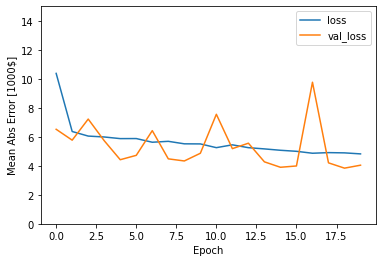

In [30]:
import matplotlib.pyplot as plt
import numpy as np


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch,
             np.array(history.history['mae']),
             label='loss')
    plt.plot(history.epoch,
             np.array(history.history['val_mae']),
             label='val_loss')
    plt.legend()
    plt.ylim([0, 15])

plot_history(network_metadata)

## 데이터표준화

In [31]:
mean = X_data.mean(axis=0)
std = X_data.std(axis=0)

In [32]:
x_train = (X_data - mean) / std
X_test = (X_test - mean) / std

In [35]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(26, activation='relu', input_shape=(13,)))
model.add(Dense(26, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))
          
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])
     
          
          
network_metadata = model.fit( x_train, y_target,
                             validation_data=(X_test, y_test),
                             epochs=100, batch_size=10,
                            )

Epoch 1/100
51/51 [==============================] - 1s 4ms/step - loss: 494.5700 - mae: 20.2990 - mse: 494.5700 - val_loss: 343.9106 - val_mae: 16.6972 - val_mse: 343.9106
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 260.1853 - mae: 13.8648 - mse: 260.1853 - val_loss: 109.1965 - val_mae: 8.5762 - val_mse: 109.1965
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 83.8370 - mae: 6.9681 - mse: 83.8370 - val_loss: 43.8873 - val_mae: 5.2561 - val_mse: 43.8873
Epoch 4/100
51/51 [==============================] - 0s 5ms/step - loss: 46.5921 - mae: 5.0101 - mse: 46.5921 - val_loss: 26.7734 - val_mae: 4.1502 - val_mse: 26.7734
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 34.7534 - mae: 4.2798 - mse: 34.7533 - val_loss: 20.2129 - val_mae: 3.6367 - val_mse: 20.2129
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 28.8850 - mae: 3.8729 - mse: 28.8850 - val_loss: 17.9311 - val_mae: 3.4361 - val_

51/51 [==============================] - 0s 2ms/step - loss: 8.1088 - mae: 1.9712 - mse: 8.1088 - val_loss: 6.3671 - val_mae: 1.9142 - val_mse: 6.3671
Epoch 51/100
51/51 [==============================] - 0s 2ms/step - loss: 8.2064 - mae: 1.9638 - mse: 8.2064 - val_loss: 4.9986 - val_mae: 1.6411 - val_mse: 4.9986
Epoch 52/100
51/51 [==============================] - 0s 2ms/step - loss: 8.2562 - mae: 1.9801 - mse: 8.2562 - val_loss: 5.2160 - val_mae: 1.7117 - val_mse: 5.2160
Epoch 53/100
51/51 [==============================] - 0s 2ms/step - loss: 8.1026 - mae: 1.9751 - mse: 8.1026 - val_loss: 4.9549 - val_mae: 1.6305 - val_mse: 4.9549
Epoch 54/100
51/51 [==============================] - 0s 2ms/step - loss: 7.9769 - mae: 1.9668 - mse: 7.9769 - val_loss: 6.1447 - val_mae: 1.8769 - val_mse: 6.1447
Epoch 55/100
51/51 [==============================] - 0s 2ms/step - loss: 7.9474 - mae: 1.9610 - mse: 7.9474 - val_loss: 4.9316 - val_mae: 1.6491 - val_mse: 4.9316
Epoch 56/100
51/51 [=========

51/51 [==============================] - 0s 2ms/step - loss: 6.2458 - mae: 1.7580 - mse: 6.2458 - val_loss: 4.3724 - val_mae: 1.5800 - val_mse: 4.3724


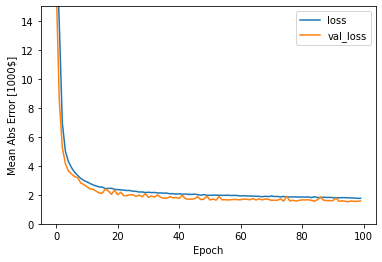

In [36]:
plot_history(network_metadata)

딥러닝이 회귀보다 성능이 더 좋게나왔다

In [38]:
y_target # 스케일링값 아님 실제값

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [39]:
model.predict(X_test)

array([[21.101715 ],
       [18.058094 ],
       [33.818604 ],
       [16.274157 ],
       [25.800713 ],
       [15.9724865],
       [22.108498 ],
       [18.648006 ],
       [10.762811 ],
       [12.481402 ],
       [17.213184 ],
       [18.558762 ],
       [23.943985 ],
       [43.6955   ],
       [18.843597 ],
       [21.908154 ],
       [10.3121805],
       [13.555722 ],
       [24.001223 ],
       [21.075603 ],
       [21.572964 ],
       [14.492283 ],
       [21.573612 ],
       [15.006527 ],
       [29.409582 ],
       [ 9.364157 ],
       [12.49149  ],
       [18.505314 ],
       [15.684091 ],
       [10.617494 ],
       [23.592014 ],
       [ 9.764487 ],
       [17.788857 ],
       [19.075245 ],
       [14.546215 ],
       [ 9.614991 ],
       [11.535158 ],
       [15.409776 ],
       [17.95956  ],
       [21.958439 ],
       [30.750198 ],
       [ 9.318715 ],
       [11.784497 ],
       [ 7.7835445],
       [18.923248 ],
       [19.990025 ],
       [29.319803 ],
       [45.07